In [ ]:
from music21 import *
import pandas as pd
import os

In [1]:
# Replace 'file_path.csv' with the path to your CSV file
file_path = '/content/drive/MyDrive/scores_data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.drop(columns=['Work', 'Source', 'MBID'])
# Display the DataFrame
df.head(5)

NameError: name 'pd' is not defined

In [ ]:
def find_xml_files(folder_path):
    xml_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.xml') or file.endswith('.musicxml'):
                xml_files.append(os.path.join(root, file))
    return xml_files

folder_path = 'JingjuMusicScoresCollection-v3'
scores = find_xml_files(folder_path)
df['File Path'] = scores
pd.set_option('display.max_colwidth', None)
df.head(5)

NameError: name 'df' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def get_melodic_patterns(score, min_notes, max_notes):
    melodic_patterns = {}
    all_notes = []

    for part in score.parts:
        all_notes.extend(part.recurse().notes)

    for note_length in range(min_notes, max_notes + 1):
        patterns = {}
        for i in range(len(all_notes) - note_length + 1):
            pattern = tuple(n.pitch for n in all_notes[i:i+note_length])
            if pattern in patterns:
                patterns[pattern] += 1
            else:
                patterns[pattern] = 1
        melodic_patterns[note_length] = patterns

    return melodic_patterns

def find_most_repeated_patterns(melodic_patterns):
    most_repeated_patterns = {}
    for pattern_length, patterns in melodic_patterns.items():
        most_repeated_patterns[pattern_length] = max(patterns.items(), key=lambda x: x[1])
    return most_repeated_patterns

# Replace 'your_score.xml' with the path to your MusicXML file
score = converter.parse('JingjuMusicScoresCollection-v3\Jingju Scores Dataset\MusicXML\daeh-LiYanFei-ErJinGong.xml')

min_notes = 3  # Minimum number of notes in a pattern
max_notes = 8  # Maximum number of notes in a pattern

melodic_patterns = get_melodic_patterns(score, min_notes, max_notes)
most_repeated_patterns = find_most_repeated_patterns(melodic_patterns)

In [ ]:
min_notes = 3  # Minimum number of notes in a pattern
max_notes = 8  # Maximum number of notes in a pattern

for file_index, file_path in enumerate(df['File Path']):
    score = converter.parse(file_path)
    melodic_patterns = get_melodic_patterns(score, min_notes, max_notes)
    most_repeated_patterns = find_most_repeated_patterns(melodic_patterns)

    for note_length, (pattern, count) in most_repeated_patterns.items():
        pattern_str = ", ".join(str(p) for p in pattern)
        pattern_column = f'{note_length} note pattern'
        repetition_column = f'{note_length} note repetition'
        df.loc[file_index, pattern_column] = pattern_str
        df.loc[file_index, repetition_column] = count

In [ ]:
df.head(5)

,File name,Role type,Shengqiang,Banshi,Accompaniment,File Path,3 note pattern,3 note repetition,4 note pattern,4 note repetition,5 note pattern,5 note repetition,6 note pattern,6 note repetition,7 note pattern,7 note repetition,8 note pattern,8 note repetition
0,daeh-CanQiQi-WuLongZuo,dan,erhuang,manban,yes,JingjuMusicScoresCollection-v3\Jingju Scores Dataset\MusicXML\daeh-CanQiQi-WuLongZuo.xml,"C#4, B3, C#4",46.0,"D#4, C#4, B3, C#4",24.0,"D#4, C#4, B3, C#4, E4",9.0,"F#4, G#4, D#4, C#4, B3, C#4",7.0,"C#4, C#4, C#4, C#4, C#4, C#4, C#4",4.0,"D#4, C#4, B3, C#4, E4, C#4, E4, F#4",3.0
1,daeh-LiYanFei-DaBaoGuo,dan,erhuang,manban,no,JingjuMusicScoresCollection-v3\Jingju Scores Dataset\MusicXML\daeh-LiYanFei-DaBaoGuo.xml,"B4, G#4, B4",32.0,"B4, G#4, B4, C#5",23.0,"B4, B4, G#4, B4, C#5",16.0,"G#4, B4, B4, G#4, B4, C#5",9.0,"C#5, C#5, G#4, B4, B4, G#4, B4",8.0,"C#5, C#5, G#4, B4, B4, G#4, B4, C#5",8.0
2,daeh-LiYanFei-ErJinGong,dan,erhuang,zhongsanyan,no,JingjuMusicScoresCollection-v3\Jingju Scores Dataset\MusicXML\daeh-LiYanFei-ErJinGong.xml,"D#4, C#4, B3",23.0,"B4, G#4, B4, C#5",15.0,"B4, B4, G#4, B4, C#5",8.0,"C#5, B4, G#4, B4, C#5, B4",5.0,"C#5, B4, G#4, B4, C#5, B4, E5",4.0,"B4, C#5, B4, G#4, B4, C#5, B4, E5",3.0
3,daeh-NaRiFeng-YuanXiaoMi,dan,erhuang,yuanban,no,JingjuMusicScoresCollection-v3\Jingju Scores Dataset\MusicXML\daeh-NaRiFeng-YuanXiaoMi.xml,"C#4, B3, C#4",28.0,"C#4, B3, C#4, E4",17.0,"B4, C#5, E5, B4, C#5",7.0,"F#4, G#4, F#4, E4, C#4, B3",6.0,"F#4, G#4, F#4, E4, C#4, B3, C#4",6.0,"F#4, E4, C#4, B3, C#4, B3, C#4, E4",6.0
4,daeh-NuZiYou-TouJunBieYao,dan,erhuang,manban,no,JingjuMusicScoresCollection-v3\Jingju Scores Dataset\MusicXML\daeh-NuZiYou-TouJunBieYao.xml,"D#5, C#5, B4",16.0,"B4, G#4, B4, C#5",11.0,"B4, G#4, B4, C#5, B4",5.0,"D#5, F#5, D#5, C#5, B4, C#5",4.0,"C#5, D#5, F#5, D#5, C#5, B4, C#5",3.0,"F#5, D#5, C#5, B4, B4, G#4, B4, C#5",2.0


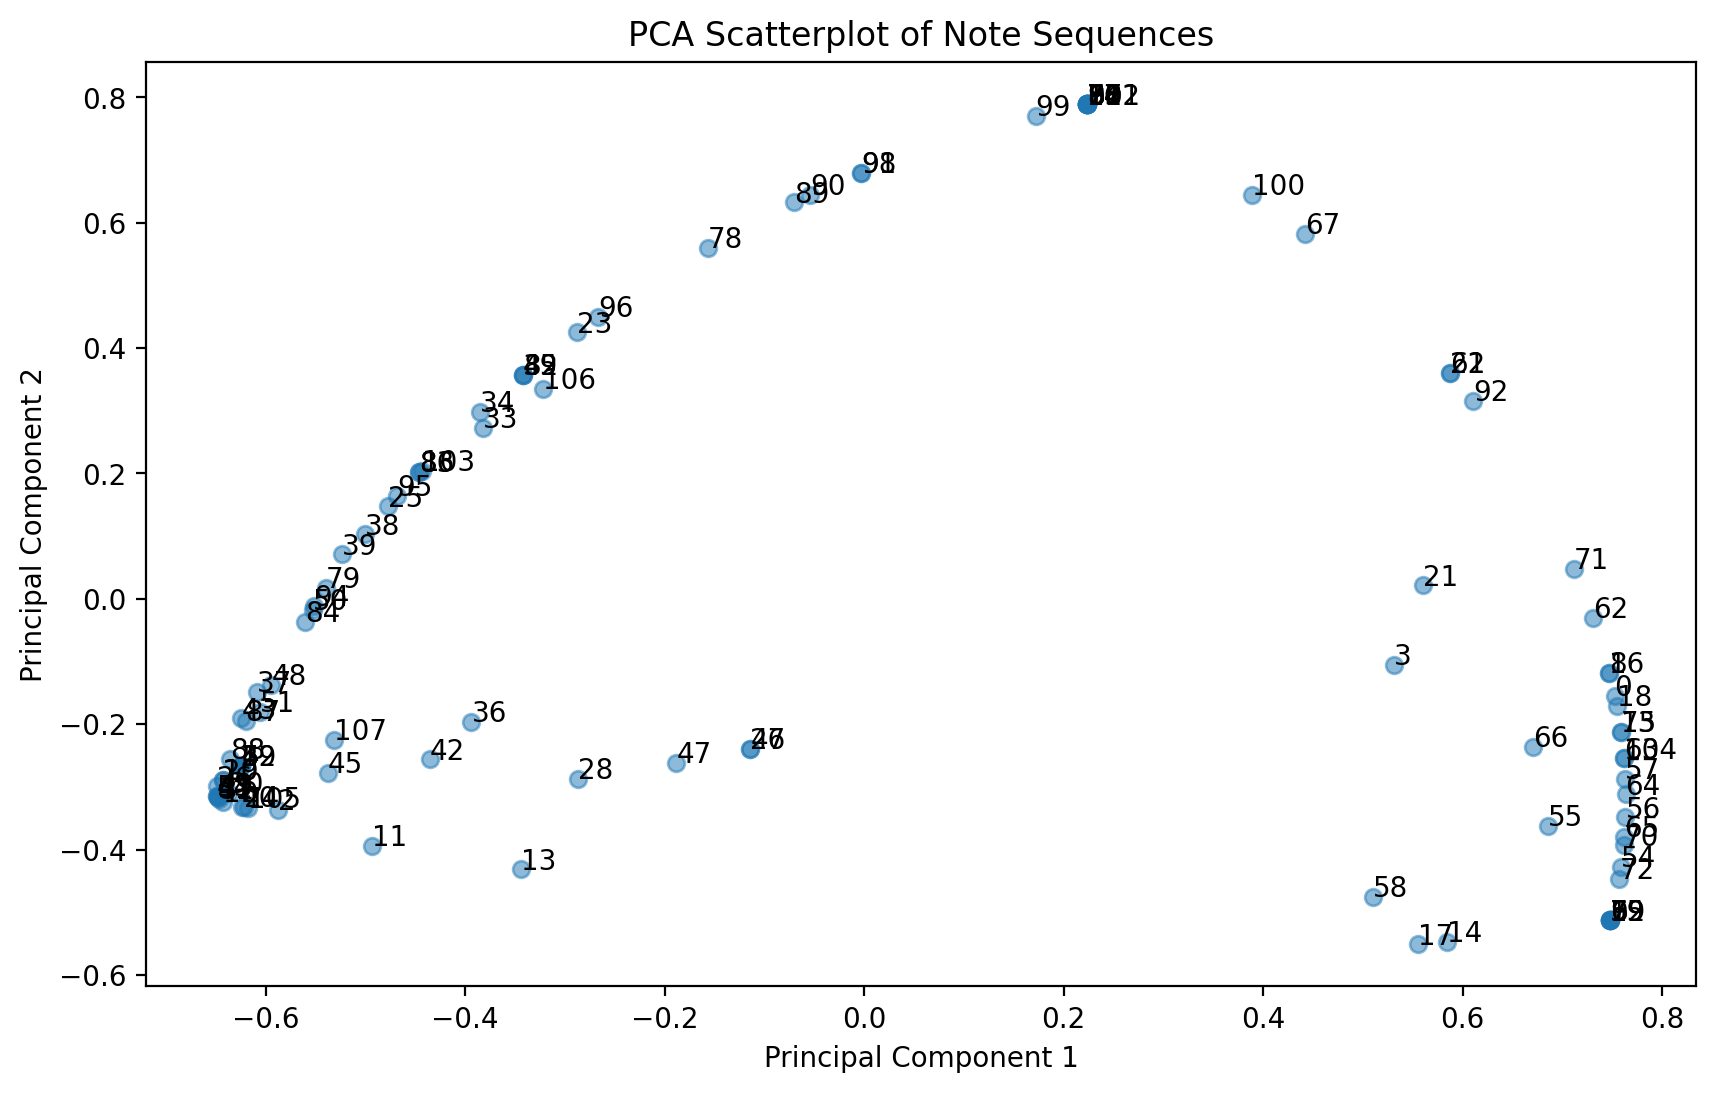

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pattern_columns = ['3 note pattern', '4 note pattern','5 note pattern', '6 note pattern', '7 note pattern', '8 note pattern']

# Concatenate selected columns into a single column
df['Patterns'] = df[pattern_columns].apply(lambda x: ' '.join(x), axis=1)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Patterns'])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

# Annotate points with note sequence indices
for i, txt in enumerate(df['File name']):
    plt.annotate(str(i), (X_pca[i, 0], X_pca[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatterplot of Note Sequences')
plt.show()

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Fit nearest neighbors model
nbrs = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X_pca)  # Adjust the number of neighbors as needed

# Get indices of nearest neighbors for each point
distances, indices = nbrs.kneighbors(X_pca)
# Initialize dictionaries to store counts of same neighbors for each condition
same_role_type_counts = {}
same_shengqiang_counts = {}
same_banshi_counts = {}
same_all_counts = {}

# Iterate over each point and its nearest neighbors
for i, neighbors in enumerate(indices):
    num_same_role_type = 0
    num_same_shengqiang = 0
    num_same_banshi = 0
    num_same_all = 0

    # Check if 'Role Type', 'Shengqiang', and 'Banshi' are the same with each neighbor
    for neighbor_idx in neighbors:
        if df.loc[i, 'Role type'] == df.loc[neighbor_idx, 'Role type']:
            num_same_role_type += 1
        if df.loc[i, 'Shengqiang'] == df.loc[neighbor_idx, 'Shengqiang']:
            num_same_shengqiang += 1
        if df.loc[i, 'Banshi'] == df.loc[neighbor_idx, 'Banshi']:
            num_same_banshi += 1
        if df.loc[i, 'Role type'] == df.loc[neighbor_idx, 'Role type'] \
                and df.loc[i, 'Shengqiang'] == df.loc[neighbor_idx, 'Shengqiang'] \
                and df.loc[i, 'Banshi'] == df.loc[neighbor_idx, 'Banshi']:
            num_same_all += 1

    # Increment counts in respective dictionaries
    same_role_type_counts[num_same_role_type] = same_role_type_counts.get(num_same_role_type, 0) + 1
    same_shengqiang_counts[num_same_shengqiang] = same_shengqiang_counts.get(num_same_shengqiang, 0) + 1
    same_banshi_counts[num_same_banshi] = same_banshi_counts.get(num_same_banshi, 0) + 1
    same_all_counts[num_same_all] = same_all_counts.get(num_same_all, 0) + 1

# Calculate percentages for each condition
total_items = len(indices)
percentages_role_type = {key: (value / total_items) * 100 for key, value in same_role_type_counts.items()}
percentages_shengqiang = {key: (value / total_items) * 100 for key, value in same_shengqiang_counts.items()}
percentages_banshi = {key: (value / total_items) * 100 for key, value in same_banshi_counts.items()}
percentages_all = {key: (value / total_items) * 100 for key, value in same_all_counts.items()}

# Print tables
def print_table(header, percentages):
    print(header)
    print("Number of Same Neighbors | Percentage of Items")
    print("----------------------------------------------")
    for num_same_neighbors in range(6):  # Adjust range if needed
        print(f"{num_same_neighbors:<25}| {percentages.get(num_same_neighbors, 0):.2f}%")
    print()

print_table("Same Role Type", percentages_role_type)
print_table("Same Shengqiang", percentages_shengqiang)
print_table("Same Banshi", percentages_banshi)
print_table("Same Role Type, Shengqiang, and Banshi", percentages_all)


Same Role Type
Number of Same Neighbors | Percentage of Items
----------------------------------------------
0                        | 0.00%
1                        | 11.11%
2                        | 9.26%
3                        | 15.74%
4                        | 26.85%
5                        | 37.04%

Same Shengqiang
Number of Same Neighbors | Percentage of Items
----------------------------------------------
0                        | 0.00%
1                        | 4.63%
2                        | 16.67%
3                        | 7.41%
4                        | 9.26%
5                        | 62.04%

Same Banshi
Number of Same Neighbors | Percentage of Items
----------------------------------------------
0                        | 3.70%
1                        | 43.52%
2                        | 25.00%
3                        | 18.52%
4                        | 6.48%
5                        | 2.78%

Same Role Type, Shengqiang, and Banshi
Number of Same Neighbors | Per

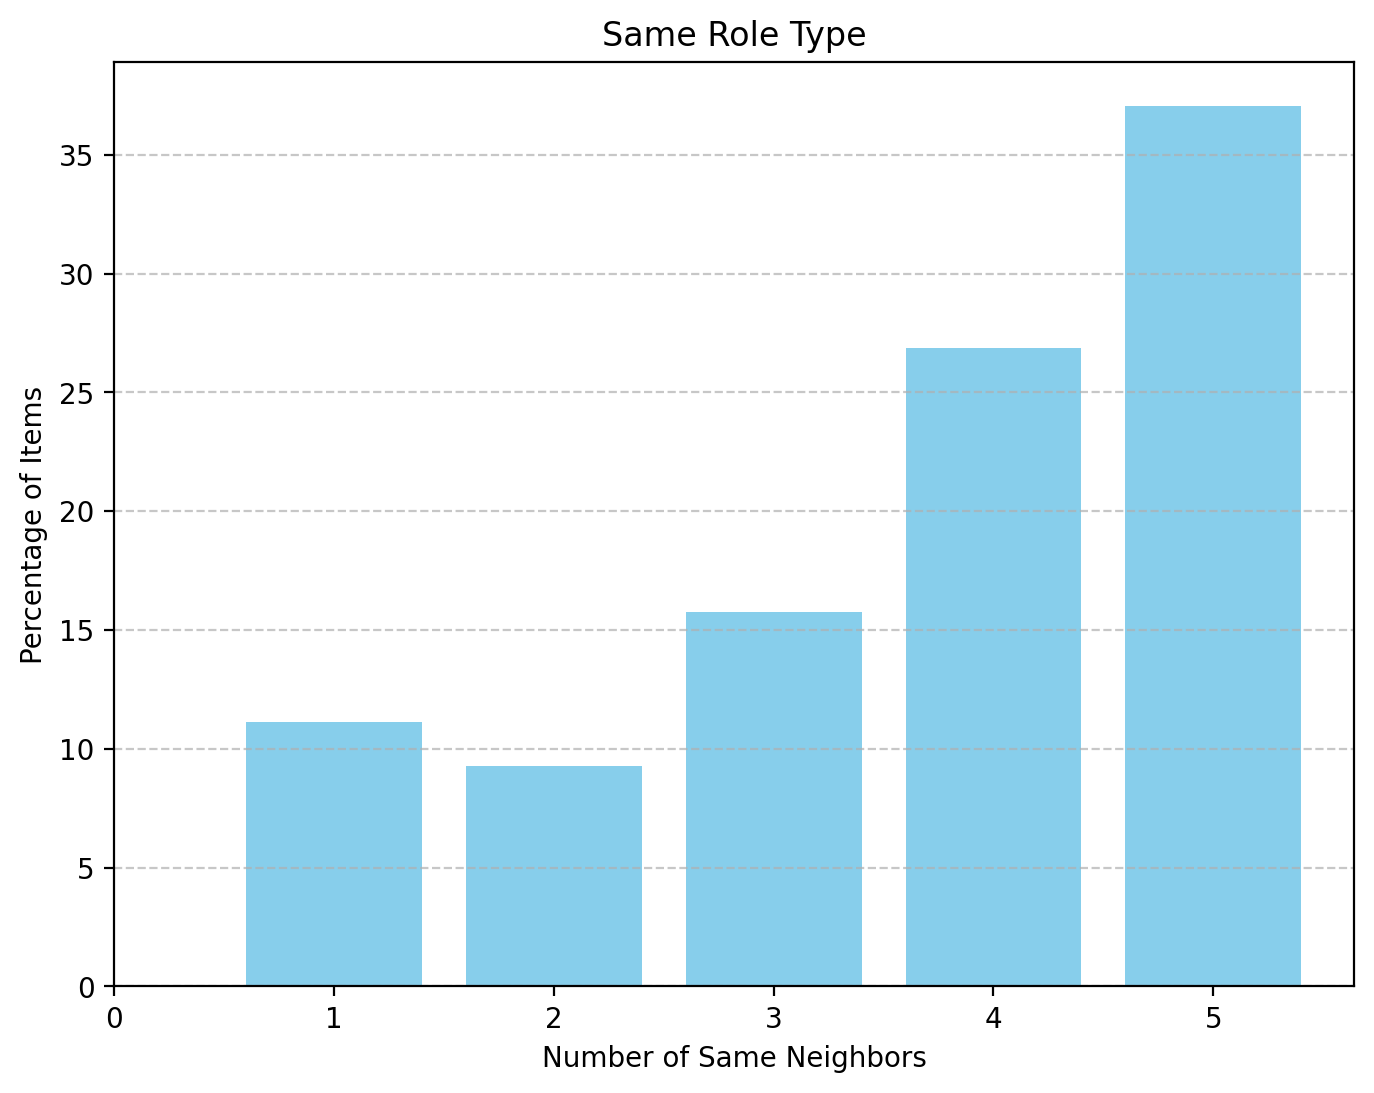

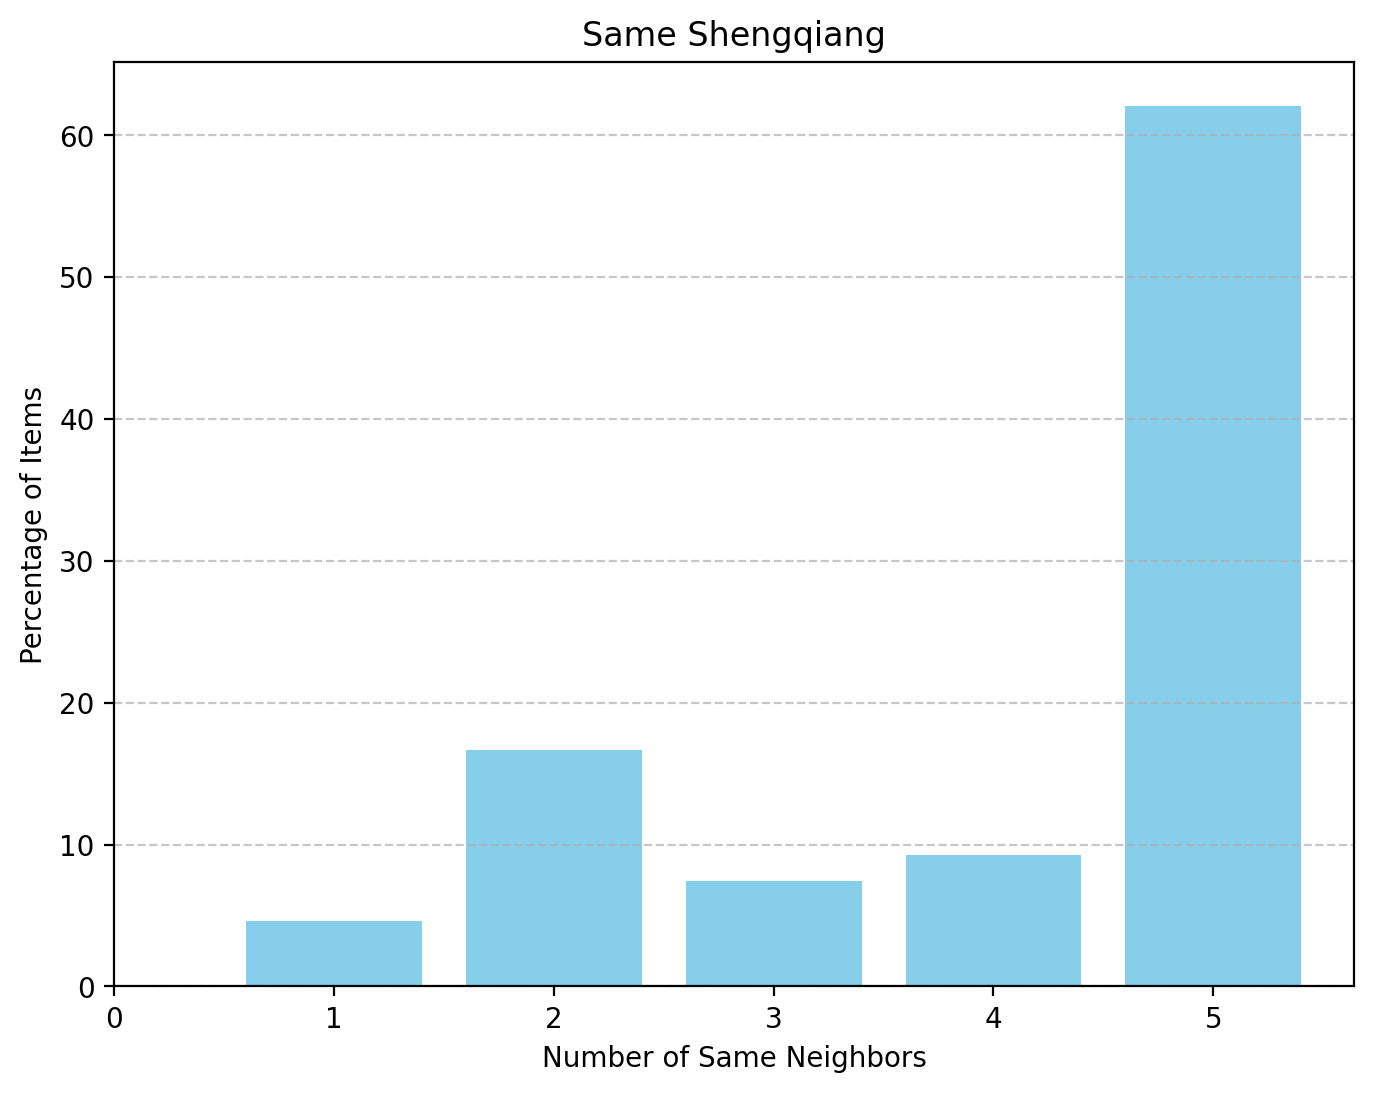

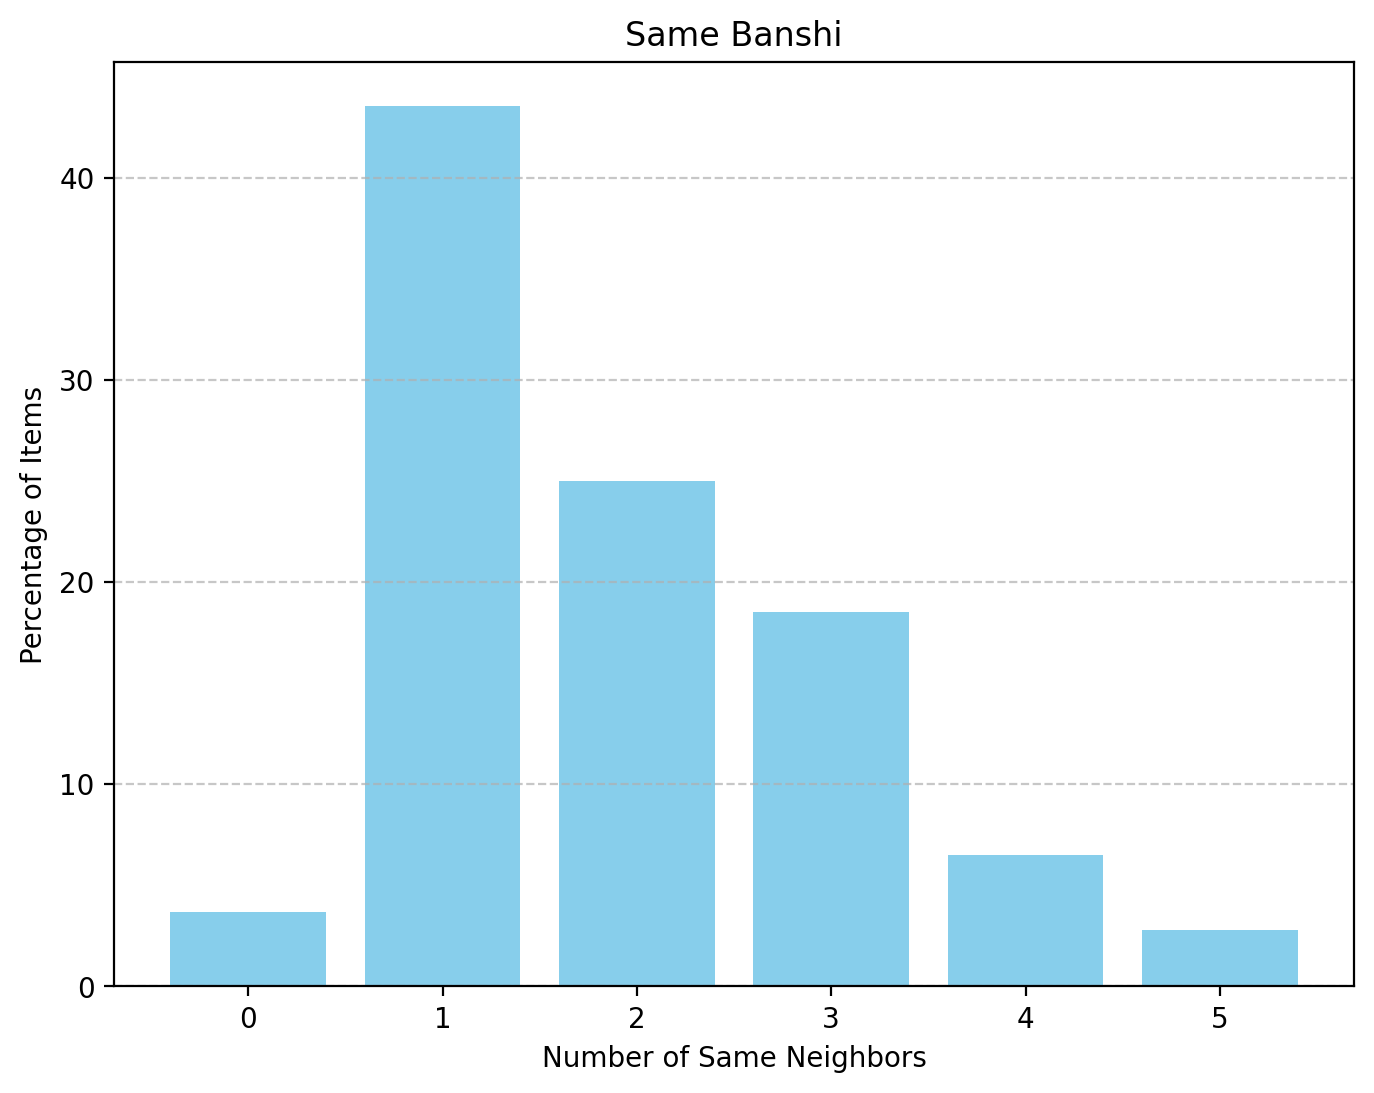

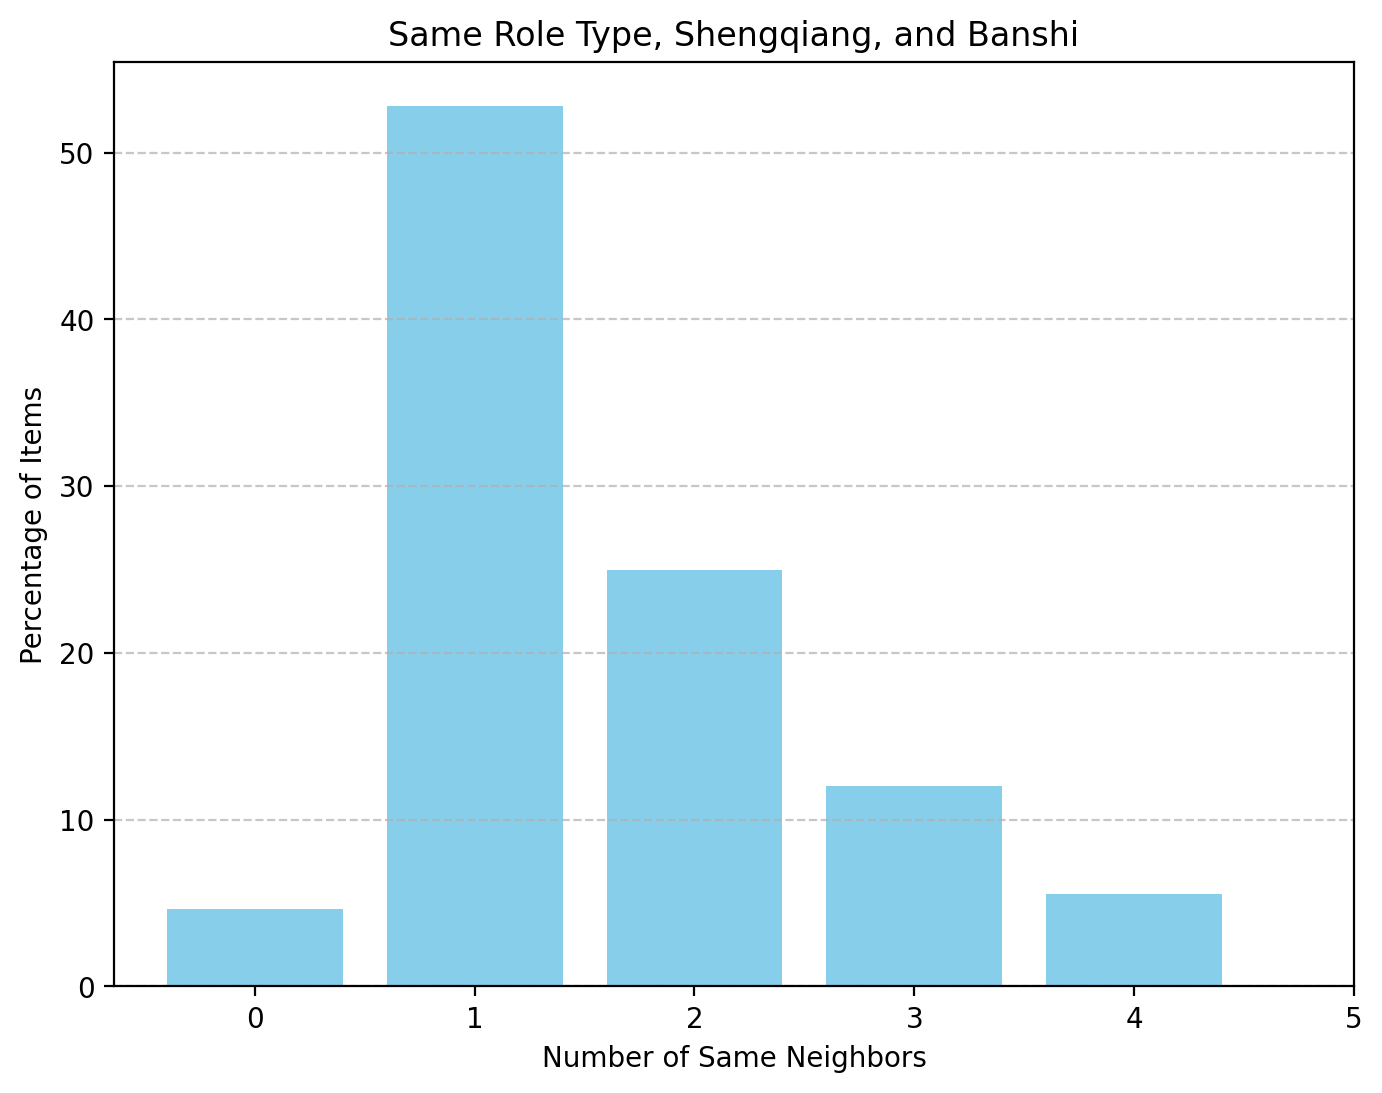

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(header, percentages):
    plt.figure(figsize=(8, 6))
    plt.bar(percentages.keys(), percentages.values(), color='skyblue')
    plt.xlabel('Number of Same Neighbors')
    plt.ylabel('Percentage of Items')
    plt.title(header)
    plt.xticks(range(6))  # Adjust range if needed
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_histogram("Same Role Type", percentages_role_type)
plot_histogram("Same Shengqiang", percentages_shengqiang)
plot_histogram("Same Banshi", percentages_banshi)
plot_histogram("Same Role Type, Shengqiang, and Banshi", percentages_all)
